In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%pip install fuzzywuzzy
%pip install seaborn
%pip install pandas

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import time
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
df=pd.read_csv("/kaggle/input/first-quora-dataset/q_quora.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/first-quora-dataset/q_quora.csv'

In [3]:
df.shape

(404351, 13)

In [4]:
df=df[["id","qid1","qid2","question1","question2","is_duplicate"]]
df.shape

(404351, 6)

In [5]:
df["is_duplicate"]=pd.to_numeric(df["is_duplicate"],errors="coerce")
df["is_duplicate"].value_counts()

is_duplicate
0.0    254748
1.0    149267
Name: count, dtype: int64

In [6]:
df.shape

(404351, 6)

In [7]:
df=df.dropna()
df.shape

(404012, 6)

In [8]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
70319,70319,139764,139765,What percentage of rich Indians invest in the ...,Who are the stock brokers of billionaires?,0.0
139384,139384,275919,275920,Which tank will be full first?,"Is it bad to fill gas tank every day, even whe...",0.0
23286,23286,46459,46460,Why is the output of the given code(in comment...,How is Disaronno made?,0.0
66781,66781,132773,132774,How do I know whether person is lying?,How do I know that a person is lying to me?,1.0
218027,218027,429878,429879,If you could wave a magic wand and change one ...,"If you could change one feature of yourself, w...",1.0


In [9]:
df["is_duplicate"]=df["is_duplicate"].astype(int)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404012 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404012 non-null  int64 
 1   qid1          404012 non-null  int64 
 2   qid2          404012 non-null  int64 
 3   question1     404012 non-null  object
 4   question2     404012 non-null  object
 5   is_duplicate  404012 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [11]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
ques_ids=pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
np.unique(ques_ids).shape[0]#Unique Questions

789148

In [14]:
x=ques_ids.value_counts()>1
x[x].shape[0]#Duplicate Questions

13675

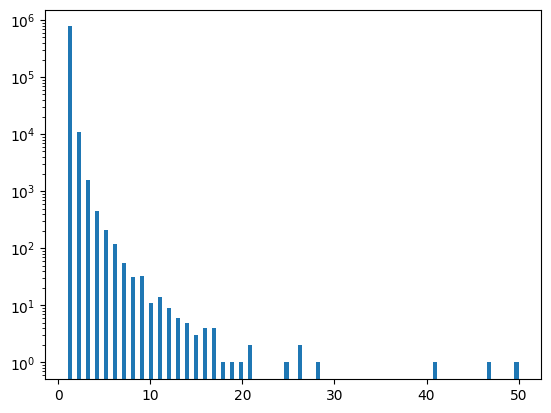

In [15]:
plt.hist(ques_ids.value_counts().values,bins=100)
plt.yscale("log")
plt.show()

In [16]:
new_df=df.sample(50000)

In [17]:
ques_df=new_df[["question1","question2"]]
ques_df

,question1,question2
372997,What is it like to microdose DMT?,How do I smoke DMT?
294739,Which is the best laptop to buy for rs. 60000?,Which is the best laptop for 60k?
376157,The Nexus 4 comes with a charger with an outpu...,What effects does a 2 amps output charger have...
297142,What is 19 too old for?,I'm 16. Is a 19-year-old guy too old to be my ...
99917,How do I always win an argument?,How do I always win an argument with parents?
...,...,...
248975,How do I Volunteer and Learn Arabic in Palestine?,How can I go to Palestine and become a volunteer?
368039,Why can't black holes be used to accelerate bo...,How can an object not accelerate past the ligh...
220424,How do old and new means of transformation dif...,How do I set access control for one device onl...
211393,"Do ""B"" students ever get accepted into top uni...",Is it a bad sign if one does not get into MIT?


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df["question1"])+list(ques_df["question2"])

cv=CountVectorizer(max_features=3000)
bow=cv.fit_transform(questions).toarray()

In [19]:
bow.shape

(100000, 3000)

In [20]:
ques1_arr,ques2_arr=np.vsplit(bow,2)

In [21]:
temp_df1=pd.DataFrame(ques1_arr,index=ques_df.index)
temp_df1

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
372997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
temp_df2=pd.DataFrame(ques2_arr,index=ques_df.index)
temp_df2

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
372997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(50000, 6000)

In [24]:
temp_df["is_duplicate"]=new_df["is_duplicate"]

In [25]:
temp_df["is_duplicate"].value_counts()

is_duplicate
0    31555
1    18445
Name: count, dtype: int64

In [26]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
372997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
376157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
x,y=temp_df.drop(columns=["is_duplicate"]),temp_df["is_duplicate"]
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40000, 6000), (10000, 6000), (40000,), (10000,))

In [28]:
start_time=time.time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
end_time=time.time()
print(acc,end_time-start_time)

0.7542 214.51009511947632


In [29]:
new_df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
327104,327104,641550,641551,What's your opinion about the decision on remo...,Is Modi's decision on demonetization of 500 an...,1
253462,253462,498948,498949,What are some of the best examples of how to l...,What is the best way to live a life?,1
68394,68394,135960,135961,How can I lose weight quickly? Need serious help.,How do I lose weight and reduce my waist quickly?,1
243538,243538,479651,479652,Why did Canada become independent from the Bri...,Why did Canada able to get UN membership and b...,0
140218,140218,277559,277560,Is high school really the best years of your l...,Is high school really the best time of my life?,1
147051,147051,290959,290960,What individuals and events in history are a s...,What individuals and events in history are a s...,0
57046,57046,113496,113497,I have lost my PAN card and I also forgot my P...,I have lost my PAN card. Should I reprint the ...,0
220424,220424,434533,434534,How do old and new means of transformation dif...,How do I set access control for one device onl...,0
1013,1013,2027,2028,Do you think of mathematics as art or science?,Is math an art or a science?,1
322693,322693,633019,633020,Is Node.js single threaded?,Why Node.js is single threaded?,1


In [30]:
new_df["is_duplicate"].value_counts()

is_duplicate
0    31555
1    18445
Name: count, dtype: int64

In [31]:
new_df["q1_len"]=new_df["question1"].str.len()
new_df["q2_len"]=new_df["question2"].str.len()

In [32]:
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
311905,311905,612231,612232,"Molestation in bus, metro stories?",What are some yearly stand up comedy competiti...,0,34,59
198196,198196,391165,391166,What is the most embarrassing moment you have ...,What has been your most embarrassing moment in...,1,80,67
283237,283237,556724,556725,How many Indian satellites are currently orbit...,Which nation has launched the most satellites ...,0,74,70
28875,28875,57568,57569,What city is Gotham?,Is Gotham City based on any city?,1,20,33
289403,289403,568652,335481,How much data does voice calling over Facebook...,How can I use Facebook chat in a XP messenger?,0,61,46
178779,178779,353141,353142,Why don't people answer me on Quora?,Why do people never answer my question on Quora?,1,36,48
4549,4549,9096,9097,Rastriya military school blore?,"I got 62% in X, 71% in XII and 61% in Graduati...",0,31,145
340885,340885,668200,354491,"In Age of Empires II, what is the build order ...",StarCraft II: What are some good Zerg build or...,0,64,67
289459,289459,568760,568761,Which is the best video player for smartphones?,What is the best video player for mac?,0,47,38
66459,66459,132131,132132,Why is the American Dream important?,"If there was a ""German Dream"" as there is an ""...",0,36,80


In [33]:
new_df["q1_num_words"]=new_df["question1"].apply(lambda row:len(row.split(" ")))
new_df["q2_num_words"]=new_df["question2"].apply(lambda row:len(row.split(" ")))
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
311905,311905,612231,612232,"Molestation in bus, metro stories?",What are some yearly stand up comedy competiti...,0,34,59,5,10
198196,198196,391165,391166,What is the most embarrassing moment you have ...,What has been your most embarrassing moment in...,1,80,67,12,12
283237,283237,556724,556725,How many Indian satellites are currently orbit...,Which nation has launched the most satellites ...,0,74,70,11,11
28875,28875,57568,57569,What city is Gotham?,Is Gotham City based on any city?,1,20,33,4,7
289403,289403,568652,335481,How much data does voice calling over Facebook...,How can I use Facebook chat in a XP messenger?,0,61,46,10,10
178779,178779,353141,353142,Why don't people answer me on Quora?,Why do people never answer my question on Quora?,1,36,48,7,9
4549,4549,9096,9097,Rastriya military school blore?,"I got 62% in X, 71% in XII and 61% in Graduati...",0,31,145,4,32
340885,340885,668200,354491,"In Age of Empires II, what is the build order ...",StarCraft II: What are some good Zerg build or...,0,64,67,14,13
289459,289459,568760,568761,Which is the best video player for smartphones?,What is the best video player for mac?,0,47,38,8,8
66459,66459,132131,132132,Why is the American Dream important?,"If there was a ""German Dream"" as there is an ""...",0,36,80,6,16


In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
def common_words(row):
    ques1=set(row["question1"].lower().strip().split(" "))
    ques2=set(row["question2"].lower().strip().split(" "))
    return len(ques1&ques2)

In [36]:
var1=new_df[0:1]
type(var1["question1"].item()),set(var1["question1"].item().lower().strip().split(" "))
var1["c"]=var1.apply(common_words,axis=1)

In [37]:
var1

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,c
372997,372997,729815,729816,What is it like to microdose DMT?,How do I smoke DMT?,0,33,19,7,5,1


In [38]:
new_df["common_words"]=new_df.apply(common_words,axis=1)
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
311905,311905,612231,612232,"Molestation in bus, metro stories?",What are some yearly stand up comedy competiti...,0,34,59,5,10,1
198196,198196,391165,391166,What is the most embarrassing moment you have ...,What has been your most embarrassing moment in...,1,80,67,12,12,5
283237,283237,556724,556725,How many Indian satellites are currently orbit...,Which nation has launched the most satellites ...,0,74,70,11,11,4
28875,28875,57568,57569,What city is Gotham?,Is Gotham City based on any city?,1,20,33,4,7,2
289403,289403,568652,335481,How much data does voice calling over Facebook...,How can I use Facebook chat in a XP messenger?,0,61,46,10,10,2
178779,178779,353141,353142,Why don't people answer me on Quora?,Why do people never answer my question on Quora?,1,36,48,7,9,5
4549,4549,9096,9097,Rastriya military school blore?,"I got 62% in X, 71% in XII and 61% in Graduati...",0,31,145,4,32,0
340885,340885,668200,354491,"In Age of Empires II, what is the build order ...",StarCraft II: What are some good Zerg build or...,0,64,67,14,13,3
289459,289459,568760,568761,Which is the best video player for smartphones?,What is the best video player for mac?,0,47,38,8,8,6
66459,66459,132131,132132,Why is the American Dream important?,"If there was a ""German Dream"" as there is an ""...",0,36,80,6,16,1


In [39]:
def total_words(row):
    ques1=set(row["question1"].lower().strip().split(" "))
    ques2=set(row["question2"].lower().strip().split(" "))
    return len(ques1)+len(ques2)

In [40]:
new_df["total_words"]=new_df.apply(total_words,axis=1)
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
311905,311905,612231,612232,"Molestation in bus, metro stories?",What are some yearly stand up comedy competiti...,0,34,59,5,10,1,15
198196,198196,391165,391166,What is the most embarrassing moment you have ...,What has been your most embarrassing moment in...,1,80,67,12,12,5,24
283237,283237,556724,556725,How many Indian satellites are currently orbit...,Which nation has launched the most satellites ...,0,74,70,11,11,4,22
28875,28875,57568,57569,What city is Gotham?,Is Gotham City based on any city?,1,20,33,4,7,2,11
289403,289403,568652,335481,How much data does voice calling over Facebook...,How can I use Facebook chat in a XP messenger?,0,61,46,10,10,2,20
178779,178779,353141,353142,Why don't people answer me on Quora?,Why do people never answer my question on Quora?,1,36,48,7,9,5,16
4549,4549,9096,9097,Rastriya military school blore?,"I got 62% in X, 71% in XII and 61% in Graduati...",0,31,145,4,32,0,30
340885,340885,668200,354491,"In Age of Empires II, what is the build order ...",StarCraft II: What are some good Zerg build or...,0,64,67,14,13,3,27
289459,289459,568760,568761,Which is the best video player for smartphones?,What is the best video player for mac?,0,47,38,8,8,6,16
66459,66459,132131,132132,Why is the American Dream important?,"If there was a ""German Dream"" as there is an ""...",0,36,80,6,16,1,21


In [41]:
new_df["word_share"]=round(new_df["common_words"]/new_df["total_words"],2)
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
311905,311905,612231,612232,"Molestation in bus, metro stories?",What are some yearly stand up comedy competiti...,0,34,59,5,10,1,15,0.07
198196,198196,391165,391166,What is the most embarrassing moment you have ...,What has been your most embarrassing moment in...,1,80,67,12,12,5,24,0.21
283237,283237,556724,556725,How many Indian satellites are currently orbit...,Which nation has launched the most satellites ...,0,74,70,11,11,4,22,0.18
28875,28875,57568,57569,What city is Gotham?,Is Gotham City based on any city?,1,20,33,4,7,2,11,0.18
289403,289403,568652,335481,How much data does voice calling over Facebook...,How can I use Facebook chat in a XP messenger?,0,61,46,10,10,2,20,0.10
178779,178779,353141,353142,Why don't people answer me on Quora?,Why do people never answer my question on Quora?,1,36,48,7,9,5,16,0.31
4549,4549,9096,9097,Rastriya military school blore?,"I got 62% in X, 71% in XII and 61% in Graduati...",0,31,145,4,32,0,30,0.00
340885,340885,668200,354491,"In Age of Empires II, what is the build order ...",StarCraft II: What are some good Zerg build or...,0,64,67,14,13,3,27,0.11
289459,289459,568760,568761,Which is the best video player for smartphones?,What is the best video player for mac?,0,47,38,8,8,6,16,0.38
66459,66459,132131,132132,Why is the American Dream important?,"If there was a ""German Dream"" as there is an ""...",0,36,80,6,16,1,21,0.05


Minimum: 1
Maximum: 391
Average: 59.50856


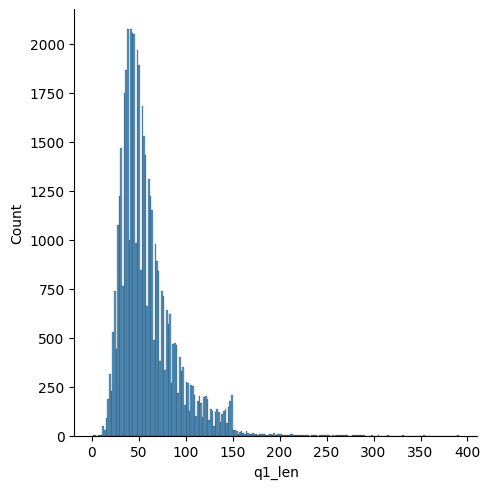

In [42]:
sns.displot(new_df["q1_len"])
print("Minimum:",new_df["q1_len"].min())
print("Maximum:",new_df["q1_len"].max())
print("Average:",new_df["q1_len"].mean())

Minimum: 1
Maximum: 1169
Average: 60.05778


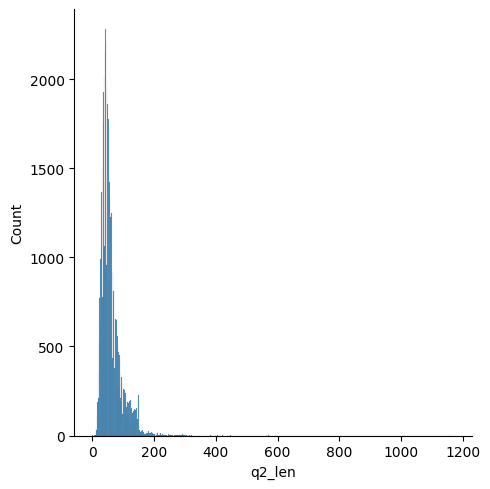

In [43]:
sns.displot(new_df["q2_len"])
print("Minimum:",new_df["q2_len"].min())
print("Maximum:",new_df["q2_len"].max())
print("Average:",new_df["q2_len"].mean())

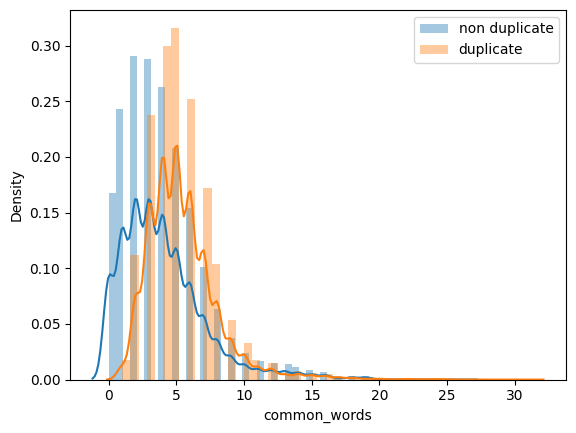

In [44]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_words'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'],label='duplicate')
plt.legend()
plt.show()

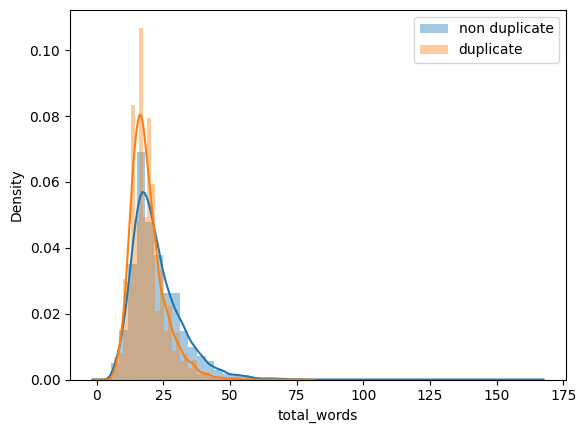

In [45]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_words'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_words'],label='duplicate')
plt.legend()
plt.show()

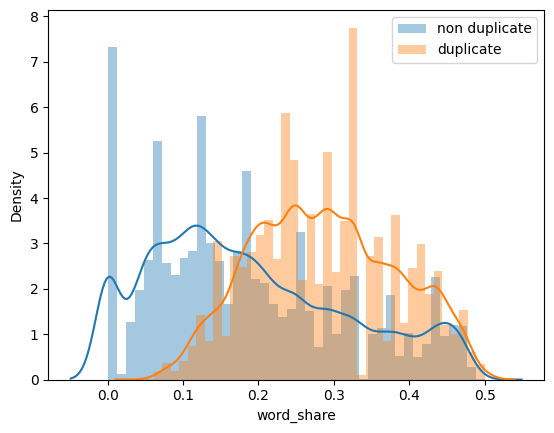

In [46]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [47]:
new_df.shape

(50000, 13)

In [48]:
new_df.sample(5,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
311905,311905,612231,612232,"Molestation in bus, metro stories?",What are some yearly stand up comedy competiti...,0,34,59,5,10,1,15,0.07
198196,198196,391165,391166,What is the most embarrassing moment you have ...,What has been your most embarrassing moment in...,1,80,67,12,12,5,24,0.21
283237,283237,556724,556725,How many Indian satellites are currently orbit...,Which nation has launched the most satellites ...,0,74,70,11,11,4,22,0.18
28875,28875,57568,57569,What city is Gotham?,Is Gotham City based on any city?,1,20,33,4,7,2,11,0.18
289403,289403,568652,335481,How much data does voice calling over Facebook...,How can I use Facebook chat in a XP messenger?,0,61,46,10,10,2,20,0.10


In [49]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
372997,What is it like to microdose DMT?,How do I smoke DMT?
294739,Which is the best laptop to buy for rs. 60000?,Which is the best laptop for 60k?
376157,The Nexus 4 comes with a charger with an outpu...,What effects does a 2 amps output charger have...
297142,What is 19 too old for?,I'm 16. Is a 19-year-old guy too old to be my ...
99917,How do I always win an argument?,How do I always win an argument with parents?


In [50]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
372997,0,33,19,7,5,1,12,0.08
294739,1,46,33,10,7,6,17,0.35
376157,0,146,159,30,31,7,50,0.14
297142,0,23,56,6,12,3,18,0.17
99917,0,32,45,7,9,6,16,0.38


In [51]:
questions=list(ques_df["question1"])+list(ques_df["question2"])

cv=CountVectorizer(max_features=3000)
bow=cv.fit_transform(questions).toarray()

In [52]:
bow.shape

(100000, 3000)

In [53]:
ques1_arr,ques2_arr=np.vsplit(bow,2)

In [54]:
temp_df1=pd.DataFrame(ques1_arr,index=ques_df.index)
temp_df1

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
372997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
temp_df2=pd.DataFrame(ques2_arr,index=ques_df.index)
temp_df2

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
372997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(50000, 6000)

In [57]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(50000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
372997,0,33,19,7,5,1,12,0.08,0,0,...,0,0,0,0,0,0,0,0,0,0
294739,1,46,33,10,7,6,17,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0
376157,0,146,159,30,31,7,50,0.14,0,0,...,0,0,0,0,0,0,0,0,0,0
297142,0,23,56,6,12,3,18,0.17,0,0,...,0,0,0,0,0,0,0,0,0,0
99917,0,32,45,7,9,6,16,0.38,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
x,y=final_df.drop(columns=["is_duplicate"]),final_df["is_duplicate"]
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40000, 6007), (10000, 6007), (40000,), (10000,))

In [59]:
start_time=time.time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
end_time=time.time()
print(acc,end_time-start_time)

0.7765 151.02350854873657


## Advanced Features

### Previous Features
* All 7 features done above
* Stemming

### Token Features
* cwc_min: This is the ratio of the number of common words to the length of the smaller question
* cwc_max: This is the ratio of the number of common words to the length of the larger question
* csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
* csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
* ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
* ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
* last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
* first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

### Length Based Features
* mean_len: Mean of the length of the two questions (number of words)
* abs_len_diff: Absolute difference between the length of the two questions (number of words)
* longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the * * * length of the smaller question

### Fuzzy Features
* fuzz_ratio: fuzz_ratio score from fuzzywuzzy
* fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
* token_sort_ratio: token_sort_ratio from fuzzywuzzy
* token_set_ratio: token_set_ratio from fuzzywuzzy

In [75]:
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer

In [3]:
df=pd.read_csv("/kaggle/input/first-quora-dataset/q_quora.csv")
df.head()

/tmp/ipykernel_33/496136581.py:1: DtypeWarning: Columns (7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/first-quora-dataset/q_quora.csv")


,id,qid1,qid2,question1,question2,is_duplicate,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df=df[["id","qid1","qid2","question1","question2","is_duplicate"]]
df.shape

(404351, 6)

In [5]:
df["is_duplicate"]=pd.to_numeric(df["is_duplicate"],errors="coerce")
df["is_duplicate"].value_counts()

is_duplicate
0.0    254748
1.0    149267
Name: count, dtype: int64

In [6]:
df=df.dropna()
df.shape

(404012, 6)

In [7]:
df["is_duplicate"]=df["is_duplicate"].astype(int)

In [8]:
new_df=df.sample(50000,random_state=42)
new_df.shape

(50000, 6)

In [9]:
df["is_duplicate"]=df["is_duplicate"].astype(int)

In [10]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
141681,141681,280433,280434,Is eating chyawanprash really beneficial to yo...,Is eating whole grain really healthly?,0
119686,119686,237199,237200,What's the funniest thing that you have ever d...,What's the funniest thing you have ever done t...,1
275629,275629,541957,541958,What is the best website to learn java from be...,Which is the best website to learn Java?,0
321097,321097,629934,629935,Can I get a DSLR camera for rent in Chennai?,Where can I rent a DSLR camera in ranchi?,0
256664,256664,505187,505188,How much does a website cost from scratch?,How much does it cost to run a website?,1


In [37]:
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
267670,267670,526535,526536,What separates the top 10% of startup CEOs fro...,What separates the bottom 10% of startup CEOs ...,1
298774,298774,586839,586840,Which is the fastest chemical reaction?,What is the fastest chemical reaction?,1
41234,41234,82132,82133,How do you get IMVU credits fast?,How do I start getting credit?,0
159092,159092,314577,314578,What is your most memorable cultural shock?,What is your biggest cultural shock and realiz...,0
150397,150397,297527,297528,What exactly happens to the human body upon im...,What exactly happens to human body when a bull...,0


In [45]:
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
189067,189067,373293,373294,Auto Fabrication and the Quest for Better Vehi...,My furnace is blowing cold air. What is the po...,0
206637,206637,407659,105626,What is the difference between trademark and p...,What is the difference between a copyright and...,0
289614,289614,569058,569059,Can I get back my money from paytm wallet to m...,Can we transfer the cash back earned in a Payt...,0
309572,309572,607718,607719,"In the GATE 2017 preparation cse, which subjec...","In the GATE 2017 preparation for EC, which sub...",0
283382,283382,556996,556997,Should the guilty people who get death penalty...,Could you use transcriptomics to drug test peo...,0


In [3]:
%pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [71]:
import contractions
s=contractions.fix("I amn't going to the party cause I'm unwell.<html>That's known 3 o'clock?!?</html>")
s

'I am not going to the party because I am unwell.<html>That is known 3 of the clock?!?</html>'

In [72]:
ptrn=re.compile("\W")
re.sub(ptrn," ",s).strip()

'I am not going to the party because I am unwell  html That is known 3 of the clock     html'

In [76]:
def preprocess(row):
    ps=PorterStemmer()
    row=str(row).lower().strip()
    
    row=row.replace("%","percent")
    row=row.replace("$","dollar")
    row=row.replace('₹',"rupee")
    row=row.replace('€',"euro")
    row=row.replace("@","at")
    
    row=row.replace("[math]"," ")
    
    #Regex Tutorial at:https://www3.ntu.edu.sg/home/ehchua/programming/howto/Regexe.html
    #Using Contractions Library else list available at:https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/19794953#19794953
    
    row=re.sub(r"([0-9]+)000000000",r"\1b",row)
    row=re.sub(r"([0-9]+)000000",r"\1m",row)
    row=re.sub(r"([0-9]+)000",r"\1k",row)
    
    row=contractions.fix(row)
    
    row=BeautifulSoup(row,"lxml")
    row=row.get_text()
    
    ptrn=re.compile("\W")
    row=re.sub(ptrn," ",row).strip()
    
    row=" ".join([ps.stem(word) for word in row.split(" ")])
    
    return row

In [77]:
preprocess(s)

'i am not go to the parti becaus i am unwel that is known 3 of the clock'

In [74]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
141681,141681,280433,280434,Is eating chyawanprash really beneficial to yo...,Is eating whole grain really healthly?,0
119686,119686,237199,237200,What's the funniest thing that you have ever d...,What's the funniest thing you have ever done t...,1
275629,275629,541957,541958,What is the best website to learn java from be...,Which is the best website to learn Java?,0
321097,321097,629934,629935,Can I get a DSLR camera for rent in Chennai?,Where can I rent a DSLR camera in ranchi?,0
256664,256664,505187,505188,How much does a website cost from scratch?,How much does it cost to run a website?,1


In [80]:
new_df["question1"]=new_df["question1"].apply(preprocess)
new_df["question2"]=new_df["question2"].apply(preprocess)
new_df.head()

/tmp/ipykernel_33/3178050891.py:22: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  row=BeautifulSoup(row)


,id,qid1,qid2,question1,question2,is_duplicate
141681,141681,280433,280434,is eat chyawanprash realli benefici to your he...,is eat whole grain realli healthli,0
119686,119686,237199,237200,what is the funniest thing that you have ever ...,what is the funniest thing you have ever done ...,1
275629,275629,541957,541958,what is the best websit to learn java from beg...,which is the best websit to learn java,0
321097,321097,629934,629935,can i get a dslr camera for rent in chennai,where can i rent a dslr camera in ranchi,0
256664,256664,505187,505188,how much doe a websit cost from scratch,how much doe it cost to run a websit,1


In [82]:
new_df["q1_len"]=new_df["question1"].str.len()
new_df["q2_len"]=new_df["question2"].str.len()

In [83]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
141681,141681,280433,280434,is eat chyawanprash realli benefici to your he...,is eat whole grain realli healthli,0,84,34
119686,119686,237199,237200,what is the funniest thing that you have ever ...,what is the funniest thing you have ever done ...,1,60,55
275629,275629,541957,541958,what is the best websit to learn java from beg...,which is the best websit to learn java,0,58,38
321097,321097,629934,629935,can i get a dslr camera for rent in chennai,where can i rent a dslr camera in ranchi,0,43,40
256664,256664,505187,505188,how much doe a websit cost from scratch,how much doe it cost to run a websit,1,39,36


In [84]:
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
93619,93619,185860,185861,what is a graphic process unit,what is a graphic process unit gpu,1,30,35
74432,74432,147909,147910,daniel ek are there ani futur plan of releas ...,whi ha not daniel ek brought spotifi to india,1,62,45
185417,185417,366150,366151,how doe ban 500 and 1k rupe note help to contr...,how is black money curb with the ban of 1k rup...,1,60,90
99906,99906,198252,198253,what are the career option after obtain an msc...,what should i do after major in mathemat,1,58,40
326221,326221,639844,639845,do you agre that donald trump is a trust fund ...,who is donald trump s base whi is he popular ...,0,50,108
95888,95888,190342,190343,what is the most healthi bread for weight loss,in constant speed turbin characterist curv can...,0,46,85
325197,325197,637877,637878,what is the worst job you have had,what is the worst job you have ever had,1,34,39
107680,107680,213554,213555,what is the best way to list board posit for e...,if i sign in to linkedin in an incognito windo...,0,104,132
132501,132501,262426,262427,is ca realli tough,is do ca realli tough and lengthi cours,1,18,39
29186,29186,58185,58186,can we build car that run on tap water,can you run your car on water,1,38,29


In [85]:
new_df["q1_num_words"]=new_df["question1"].apply(lambda row:len(row.split(" ")))
new_df["q2_num_words"]=new_df["question2"].apply(lambda row:len(row.split(" ")))
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
93619,93619,185860,185861,what is a graphic process unit,what is a graphic process unit gpu,1,30,35,6,8
74432,74432,147909,147910,daniel ek are there ani futur plan of releas ...,whi ha not daniel ek brought spotifi to india,1,62,45,13,9
185417,185417,366150,366151,how doe ban 500 and 1k rupe note help to contr...,how is black money curb with the ban of 1k rup...,1,60,90,13,20
99906,99906,198252,198253,what are the career option after obtain an msc...,what should i do after major in mathemat,1,58,40,11,8
326221,326221,639844,639845,do you agre that donald trump is a trust fund ...,who is donald trump s base whi is he popular ...,0,50,108,11,26
95888,95888,190342,190343,what is the most healthi bread for weight loss,in constant speed turbin characterist curv can...,0,46,85,9,14
325197,325197,637877,637878,what is the worst job you have had,what is the worst job you have ever had,1,34,39,8,9
107680,107680,213554,213555,what is the best way to list board posit for e...,if i sign in to linkedin in an incognito windo...,0,104,132,20,31
132501,132501,262426,262427,is ca realli tough,is do ca realli tough and lengthi cours,1,18,39,4,8
29186,29186,58185,58186,can we build car that run on tap water,can you run your car on water,1,38,29,9,7


In [86]:
def common_words(row):
    ques1=set(row["question1"].lower().strip().split(" "))
    ques2=set(row["question2"].lower().strip().split(" "))
    return len(ques1&ques2)

new_df["common_words"]=new_df.apply(common_words,axis=1)
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words
93619,93619,185860,185861,what is a graphic process unit,what is a graphic process unit gpu,1,30,35,6,8,6
74432,74432,147909,147910,daniel ek are there ani futur plan of releas ...,whi ha not daniel ek brought spotifi to india,1,62,45,13,9,4
185417,185417,366150,366151,how doe ban 500 and 1k rupe note help to contr...,how is black money curb with the ban of 1k rup...,1,60,90,13,20,9
99906,99906,198252,198253,what are the career option after obtain an msc...,what should i do after major in mathemat,1,58,40,11,8,4
326221,326221,639844,639845,do you agre that donald trump is a trust fund ...,who is donald trump s base whi is he popular ...,0,50,108,11,26,4
95888,95888,190342,190343,what is the most healthi bread for weight loss,in constant speed turbin characterist curv can...,0,46,85,9,14,0
325197,325197,637877,637878,what is the worst job you have had,what is the worst job you have ever had,1,34,39,8,9,8
107680,107680,213554,213555,what is the best way to list board posit for e...,if i sign in to linkedin in an incognito windo...,0,104,132,20,31,6
132501,132501,262426,262427,is ca realli tough,is do ca realli tough and lengthi cours,1,18,39,4,8,4
29186,29186,58185,58186,can we build car that run on tap water,can you run your car on water,1,38,29,9,7,5


In [87]:
def total_words(row):
    ques1=set(row["question1"].lower().strip().split(" "))
    ques2=set(row["question2"].lower().strip().split(" "))
    return len(ques1)+len(ques2)

new_df["total_words"]=new_df.apply(total_words,axis=1)
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
93619,93619,185860,185861,what is a graphic process unit,what is a graphic process unit gpu,1,30,35,6,8,6,14
74432,74432,147909,147910,daniel ek are there ani futur plan of releas ...,whi ha not daniel ek brought spotifi to india,1,62,45,13,9,4,22
185417,185417,366150,366151,how doe ban 500 and 1k rupe note help to contr...,how is black money curb with the ban of 1k rup...,1,60,90,13,20,9,30
99906,99906,198252,198253,what are the career option after obtain an msc...,what should i do after major in mathemat,1,58,40,11,8,4,19
326221,326221,639844,639845,do you agre that donald trump is a trust fund ...,who is donald trump s base whi is he popular ...,0,50,108,11,26,4,30
95888,95888,190342,190343,what is the most healthi bread for weight loss,in constant speed turbin characterist curv can...,0,46,85,9,14,0,23
325197,325197,637877,637878,what is the worst job you have had,what is the worst job you have ever had,1,34,39,8,9,8,17
107680,107680,213554,213555,what is the best way to list board posit for e...,if i sign in to linkedin in an incognito windo...,0,104,132,20,31,6,44
132501,132501,262426,262427,is ca realli tough,is do ca realli tough and lengthi cours,1,18,39,4,8,4,12
29186,29186,58185,58186,can we build car that run on tap water,can you run your car on water,1,38,29,9,7,5,16


In [88]:
new_df["word_share"]=round(new_df["common_words"]/new_df["total_words"],2)
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
93619,93619,185860,185861,what is a graphic process unit,what is a graphic process unit gpu,1,30,35,6,8,6,14,0.43
74432,74432,147909,147910,daniel ek are there ani futur plan of releas ...,whi ha not daniel ek brought spotifi to india,1,62,45,13,9,4,22,0.18
185417,185417,366150,366151,how doe ban 500 and 1k rupe note help to contr...,how is black money curb with the ban of 1k rup...,1,60,90,13,20,9,30,0.30
99906,99906,198252,198253,what are the career option after obtain an msc...,what should i do after major in mathemat,1,58,40,11,8,4,19,0.21
326221,326221,639844,639845,do you agre that donald trump is a trust fund ...,who is donald trump s base whi is he popular ...,0,50,108,11,26,4,30,0.13
95888,95888,190342,190343,what is the most healthi bread for weight loss,in constant speed turbin characterist curv can...,0,46,85,9,14,0,23,0.00
325197,325197,637877,637878,what is the worst job you have had,what is the worst job you have ever had,1,34,39,8,9,8,17,0.47
107680,107680,213554,213555,what is the best way to list board posit for e...,if i sign in to linkedin in an incognito windo...,0,104,132,20,31,6,44,0.14
132501,132501,262426,262427,is ca realli tough,is do ca realli tough and lengthi cours,1,18,39,4,8,4,12,0.33
29186,29186,58185,58186,can we build car that run on tap water,can you run your car on water,1,38,29,9,7,5,16,0.31


In [90]:
s="I am playing cricket for Kolkata Kinght Riders"
s.split(" ")

['I', 'am', 'playing', 'cricket', 'for', 'Kolkata', 'Kinght', 'Riders']

In [95]:
# Advanced Features

from nltk.corpus import stopwords
sw_list=stopwords.words("english")

def fetch_tokens(row):
    ques1=row["question1"]
    ques2=row["question2"]
    
    ens=10**-6
    
    token_features=[0.0]*8
    
    ques1_tokens=ques1.split(" ")
    ques2_tokens=ques2.split(" ")
    
    if len(ques1_tokens)==0 or len(ques2_tokens)==0:
        return token_features
    
    ques1_words=set([word for word in ques1_tokens if word not in sw_list])
    ques2_words=set([word for word in ques2_tokens if word not in sw_list])
    
    ques1_stopwords=set([word for word in ques1_tokens if word in sw_list])
    ques2_stopwords=set([word for word in ques2_tokens if word in sw_list])
    
    common_stopwords=len(ques1_stopwords & ques2_stopwords)
    common_words=len(ques1_words & ques2_words)
    common_tokens=len(set(ques1_tokens) & set(ques2_tokens))
    
    token_features[0]=common_words/(min(len(ques1_words),len(ques2_words))+ens)
    token_features[1]=common_words/(max(len(ques1_words),len(ques2_words))+ens)
    token_features[2]=common_stopwords/(min(len(ques1_stopwords),len(ques2_stopwords))+ens)
    token_features[3]=common_stopwords/(max(len(ques1_stopwords),len(ques2_stopwords))+ens)
    token_features[4]=common_tokens/(min(len(ques1_tokens),len(ques2_tokens))+ens)
    token_features[5]=common_tokens/(max(len(ques1_tokens),len(ques2_tokens))+ens)
    
    token_features[6]=int(ques1_tokens[-1]==ques2_tokens[-1])
    token_features[7]=int(ques1_tokens[0]==ques2_tokens[0])
    
    return token_features

In [96]:
token_features=new_df.apply(fetch_tokens,axis=1)

In [97]:
new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [98]:
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
93619,93619,185860,185861,what is a graphic process unit,what is a graphic process unit gpu,1,30,35,6,8,...,14,0.43,1.000000,0.600000,1.000000,1.000000,1.000000,0.750000,0,1
74432,74432,147909,147910,daniel ek are there ani futur plan of releas ...,whi ha not daniel ek brought spotifi to india,1,62,45,13,9,...,22,0.18,0.571428,0.444444,0.000000,0.000000,0.444444,0.307692,1,0
185417,185417,366150,366151,how doe ban 500 and 1k rupe note help to contr...,how is black money curb with the ban of 1k rup...,1,60,90,13,20,...,30,0.30,0.700000,0.636364,0.666666,0.333333,0.692308,0.450000,0,1
99906,99906,198252,198253,what are the career option after obtain an msc...,what should i do after major in mathemat,1,58,40,11,8,...,19,0.21,0.500000,0.200000,0.500000,0.500000,0.500000,0.363636,1,1
326221,326221,639844,639845,do you agre that donald trump is a trust fund ...,who is donald trump s base whi is he popular ...,0,50,108,11,26,...,30,0.13,0.333333,0.200000,0.400000,0.222222,0.363636,0.153846,0,0
95888,95888,190342,190343,what is the most healthi bread for weight loss,in constant speed turbin characterist curv can...,0,46,85,9,14,...,23,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
325197,325197,637877,637878,what is the worst job you have had,what is the worst job you have ever had,1,34,39,8,9,...,17,0.47,1.000000,0.666666,1.000000,1.000000,1.000000,0.888889,1,1
107680,107680,213554,213555,what is the best way to list board posit for e...,if i sign in to linkedin in an incognito windo...,0,104,132,20,31,...,44,0.14,0.300000,0.250000,0.375000,0.214286,0.300000,0.193548,0,0
132501,132501,262426,262427,is ca realli tough,is do ca realli tough and lengthi cours,1,18,39,4,8,...,12,0.33,1.000000,0.600000,0.999999,0.333333,1.000000,0.500000,0,1
29186,29186,58185,58186,can we build car that run on tap water,can you run your car on water,1,38,29,9,7,...,16,0.31,1.000000,0.600000,0.500000,0.500000,0.714286,0.555555,1,1


In [100]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=c47dd6cd15722a29d66513e5e700dd93ab0c58e7108eeb40f12533bb14807dea
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [113]:
import distance
st=distance.lcsubstrings("cricket","cket")
st=list(st)
st[0]

'cket'

In [111]:
def length_features(row):
    ques1=row["question1"]
    ques2=row["question2"]
    
    length_features=[0.0]*3
    
    ques1_tokens=ques1.split(" ")
    ques2_tokens=ques2.split(" ")
    
    if len(ques1_tokens)==0 or len(ques2_tokens)==0:
        return length_features
    
    length_features[0]=abs(len(ques1_tokens)-len(ques2_tokens))
    length_features[1]=(len(ques1_tokens)+len(ques2_tokens))/2
    
    comm=distance.lcsubstrings(ques1,ques2)
    comm=list(comm)
    val=len(comm[0]) if comm else 0
    length_features[2]=val/(min(len(ques1),len(ques2))+10**-6)
    
    return length_features

In [112]:
length_features=new_df.apply(length_features,axis=1)

In [115]:
new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [116]:
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
93619,93619,185860,185861,what is a graphic process unit,what is a graphic process unit gpu,1,30,35,6,8,...,0.600000,1.000000,1.000000,1.000000,0.750000,0,1,2,7.0,1.000000
74432,74432,147909,147910,daniel ek are there ani futur plan of releas ...,whi ha not daniel ek brought spotifi to india,1,62,45,13,9,...,0.444444,0.000000,0.000000,0.444444,0.307692,1,0,4,11.0,0.222222
185417,185417,366150,366151,how doe ban 500 and 1k rupe note help to contr...,how is black money curb with the ban of 1k rup...,1,60,90,13,20,...,0.636364,0.666666,0.333333,0.692308,0.450000,0,1,7,16.5,0.233333
99906,99906,198252,198253,what are the career option after obtain an msc...,what should i do after major in mathemat,1,58,40,11,8,...,0.200000,0.500000,0.500000,0.500000,0.363636,1,1,3,9.5,0.300000
326221,326221,639844,639845,do you agre that donald trump is a trust fund ...,who is donald trump s base whi is he popular ...,0,50,108,11,26,...,0.200000,0.400000,0.222222,0.363636,0.153846,0,0,15,18.5,0.280000
95888,95888,190342,190343,what is the most healthi bread for weight loss,in constant speed turbin characterist curv can...,0,46,85,9,14,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,5,11.5,0.086957
325197,325197,637877,637878,what is the worst job you have had,what is the worst job you have ever had,1,34,39,8,9,...,0.666666,1.000000,1.000000,1.000000,0.888889,1,1,1,8.5,0.911765
107680,107680,213554,213555,what is the best way to list board posit for e...,if i sign in to linkedin in an incognito windo...,0,104,132,20,31,...,0.250000,0.375000,0.214286,0.300000,0.193548,0,0,11,25.5,0.096154
132501,132501,262426,262427,is ca realli tough,is do ca realli tough and lengthi cours,1,18,39,4,8,...,0.600000,0.999999,0.333333,1.000000,0.500000,0,1,4,6.0,0.888889
29186,29186,58185,58186,can we build car that run on tap water,can you run your car on water,1,38,29,9,7,...,0.600000,0.500000,0.500000,0.714286,0.555555,1,1,2,8.0,0.206897


In [117]:
from fuzzywuzzy import fuzz

/opt/conda/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [123]:
s1="India"
s2="Indian Aces"
fuzz.QRatio(s1,s2)

62

In [126]:
from fuzzywuzzy import fuzz

def fuzzy_features(row):
    
    ques1 = row['question1']
    ques2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    fuzzy_features[0] = fuzz.ratio(ques1,ques2)

    fuzzy_features[1] = fuzz.partial_ratio(ques1,ques2)

    fuzzy_features[2] = fuzz.token_sort_ratio(ques1,ques2)

    fuzzy_features[3] = fuzz.token_set_ratio(ques1,ques2)

    return fuzzy_features

In [127]:
fuzzy_features=new_df.apply(fuzzy_features,axis=1)

In [129]:
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [131]:
new_df.sample(10,random_state=42)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
93619,93619,185860,185861,what is a graphic process unit,what is a graphic process unit gpu,1,30,35,6,8,...,0.750000,0,1,2,7.0,1.000000,92,100,94,100
74432,74432,147909,147910,daniel ek are there ani futur plan of releas ...,whi ha not daniel ek brought spotifi to india,1,62,45,13,9,...,0.307692,1,0,4,11.0,0.222222,50,49,58,68
185417,185417,366150,366151,how doe ban 500 and 1k rupe note help to contr...,how is black money curb with the ban of 1k rup...,1,60,90,13,20,...,0.450000,0,1,7,16.5,0.233333,48,53,61,80
99906,99906,198252,198253,what are the career option after obtain an msc...,what should i do after major in mathemat,1,58,40,11,8,...,0.363636,1,1,3,9.5,0.300000,57,56,55,71
326221,326221,639844,639845,do you agre that donald trump is a trust fund ...,who is donald trump s base whi is he popular ...,0,50,108,11,26,...,0.153846,0,0,15,18.5,0.280000,35,48,46,53
95888,95888,190342,190343,what is the most healthi bread for weight loss,in constant speed turbin characterist curv can...,0,46,85,9,14,...,0.000000,0,0,5,11.5,0.086957,26,33,17,17
325197,325197,637877,637878,what is the worst job you have had,what is the worst job you have ever had,1,34,39,8,9,...,0.888889,1,1,1,8.5,0.911765,93,91,93,100
107680,107680,213554,213555,what is the best way to list board posit for e...,if i sign in to linkedin in an incognito windo...,0,104,132,20,31,...,0.193548,0,0,11,25.5,0.096154,19,25,49,52
132501,132501,262426,262427,is ca realli tough,is do ca realli tough and lengthi cours,1,18,39,4,8,...,0.500000,0,1,4,6.0,0.888889,63,89,63,100
29186,29186,58185,58186,can we build car that run on tap water,can you run your car on water,1,38,29,9,7,...,0.555555,1,1,2,8.0,0.206897,57,57,63,82


In [130]:
new_df.shape

(50000, 28)

In [133]:
import warnings
warnings.filterwarnings("ignore")

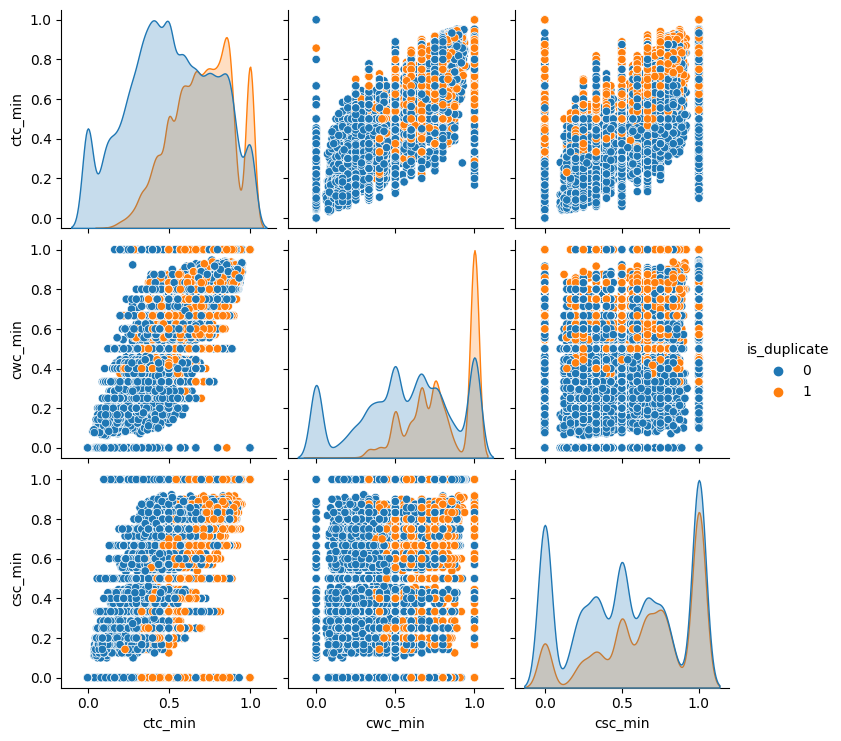

In [134]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

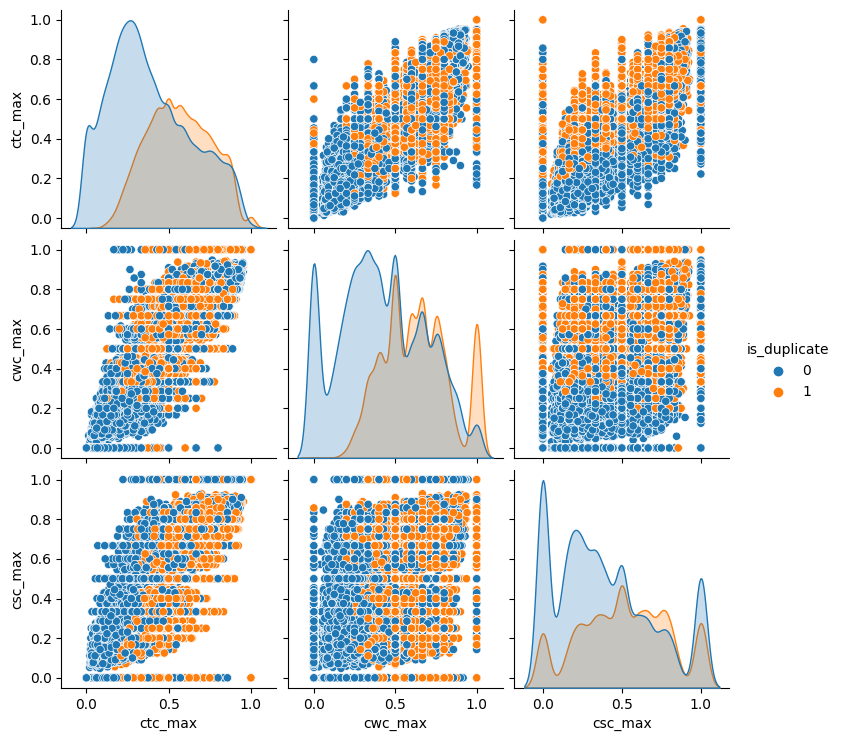

In [135]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

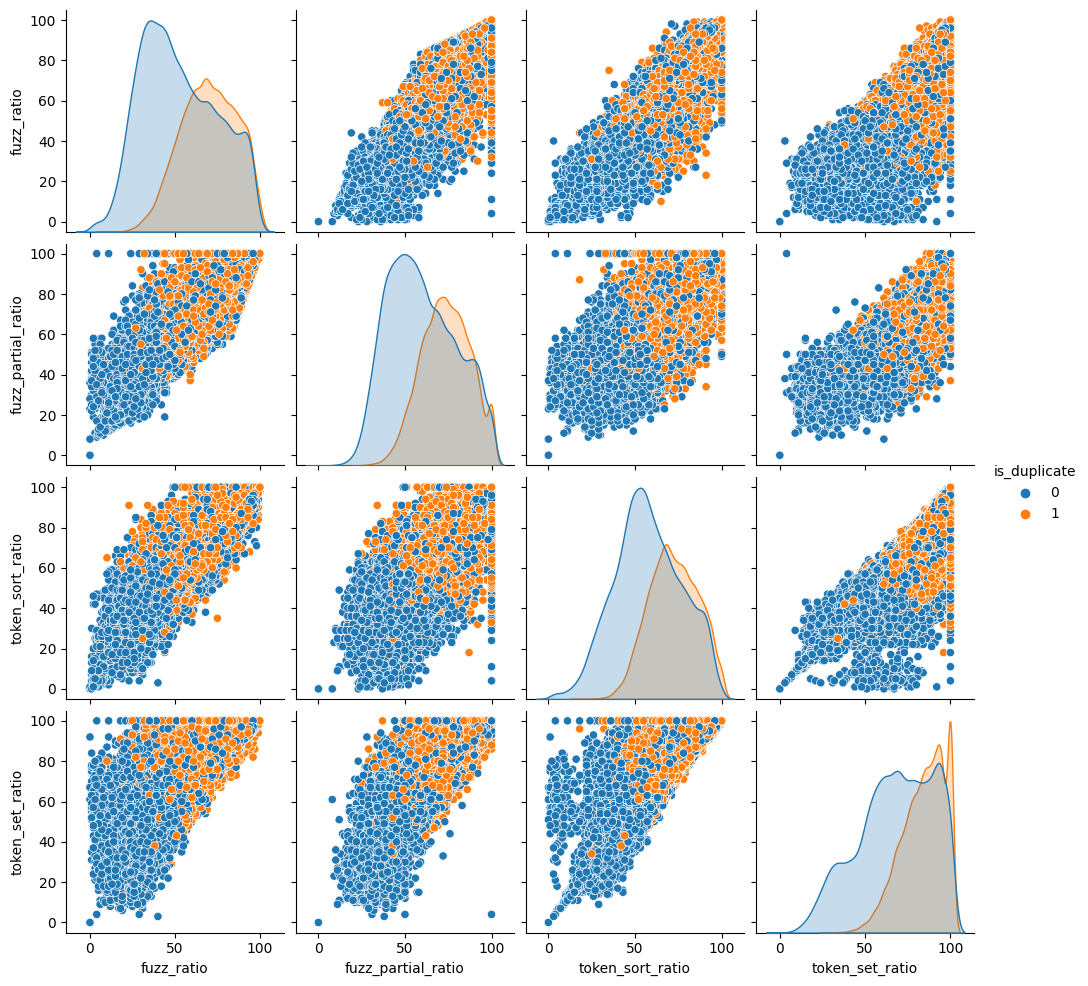

In [137]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue="is_duplicate")

In [138]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
141681,141681,280433,280434,is eat chyawanprash realli benefici to your he...,is eat whole grain realli healthli,0,84,34,16,6,...,0.187500,0,1,10,11.0,0.235294,42,59,46,55
119686,119686,237199,237200,what is the funniest thing that you have ever ...,what is the funniest thing you have ever done ...,1,60,55,12,11,...,0.916667,1,1,1,11.5,0.527273,96,91,96,100
275629,275629,541957,541958,what is the best websit to learn java from beg...,which is the best websit to learn java,0,58,38,12,8,...,0.583333,0,0,4,10.0,0.868421,73,92,73,91
321097,321097,629934,629935,can i get a dslr camera for rent in chennai,where can i rent a dslr camera in ranchi,0,43,40,10,9,...,0.700000,0,0,1,9.5,0.400000,70,70,65,82
256664,256664,505187,505188,how much doe a websit cost from scratch,how much doe it cost to run a websit,1,39,36,8,9,...,0.666667,0,1,1,8.5,0.361111,56,69,77,84


In [139]:
ques_df=new_df[["question1","question2"]]
ques_df.head()

,question1,question2
141681,is eat chyawanprash realli benefici to your he...,is eat whole grain realli healthli
119686,what is the funniest thing that you have ever ...,what is the funniest thing you have ever done ...
275629,what is the best websit to learn java from beg...,which is the best websit to learn java
321097,can i get a dslr camera for rent in chennai,where can i rent a dslr camera in ranchi
256664,how much doe a websit cost from scratch,how much doe it cost to run a websit


In [155]:
final_df = new_df.drop(columns=["id","qid1","qid2","question1","question2"])
print(final_df.shape)
final_df.head()

(50000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
141681,0,84,34,16,6,3,21,0.14,0.40,0.285714,...,0.187500,0,1,10,11.0,0.235294,42,59,46,55
119686,1,60,55,12,11,11,23,0.48,1.00,1.000000,...,0.916667,1,1,1,11.5,0.527273,96,91,96,100
275629,0,58,38,12,8,7,19,0.37,1.00,0.666667,...,0.583333,0,0,4,10.0,0.868421,73,92,73,91
321097,0,43,40,10,9,7,19,0.37,0.75,0.600000,...,0.700000,0,0,1,9.5,0.400000,70,70,65,82
256664,1,39,36,8,9,6,17,0.35,0.80,0.800000,...,0.666667,0,1,1,8.5,0.361111,56,69,77,84


In [141]:
from sklearn.feature_extraction.text import CountVectorizer
questions=list(ques_df["question1"])+list(ques_df["question2"])

cv=CountVectorizer(max_features=3000)
bow=cv.fit_transform(questions).toarray()

In [142]:
bow.shape

(100000, 3000)

In [143]:
ques1_arr,ques2_arr=np.vsplit(bow,2)

In [144]:
temp_df1=pd.DataFrame(ques1_arr,index=ques_df.index)
temp_df1

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
141681,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
119686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
temp_df2=pd.DataFrame(ques2_arr,index=ques_df.index)
temp_df2

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
141681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(50000, 6000)

In [152]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
141681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
141681,0,84,34,16,6,3,21,0.14,0.40,0.285714,...,0.187500,0,1,10,11.0,0.235294,42,59,46,55
119686,1,60,55,12,11,11,23,0.48,1.00,1.000000,...,0.916667,1,1,1,11.5,0.527273,96,91,96,100
275629,0,58,38,12,8,7,19,0.37,1.00,0.666667,...,0.583333,0,0,4,10.0,0.868421,73,92,73,91
321097,0,43,40,10,9,7,19,0.37,0.75,0.600000,...,0.700000,0,0,1,9.5,0.400000,70,70,65,82
256664,1,39,36,8,9,6,17,0.35,0.80,0.800000,...,0.666667,0,1,1,8.5,0.361111,56,69,77,84


In [157]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
141681,0,84,34,16,6,3,21,0.14,0.40,0.285714,...,0,0,0,0,0,0,0,0,0,0
119686,1,60,55,12,11,11,23,0.48,1.00,1.000000,...,0,0,0,0,0,0,0,0,0,0
275629,0,58,38,12,8,7,19,0.37,1.00,0.666667,...,0,0,0,0,0,0,0,0,0,0
321097,0,43,40,10,9,7,19,0.37,0.75,0.600000,...,0,0,0,0,0,0,0,0,0,0
256664,1,39,36,8,9,6,17,0.35,0.80,0.800000,...,0,0,0,0,0,0,0,0,0,0


In [158]:
from sklearn.model_selection import train_test_split
x,y=final_df.drop(columns=["is_duplicate"]),final_df["is_duplicate"]
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40000, 6022), (10000, 6022), (40000,), (10000,))

In [162]:
start_time=time.time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
end_time=time.time()
print("Accuracy:"+str(acc))
print("Time:"+str(end_time-start_time))

Accuracy:0.7872
Time:113.20918655395508


In [165]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [206]:
new_df.to_csv("Processed Quora.csv",index=False)

In [215]:
def common_words(q1,q2):
    ques1=set(q1.lower().strip().split(" "))
    ques2=set(q2.lower().strip().split(" "))
    return len(ques1&ques2)

In [225]:
def total_words(q1,q2):
    ques1=set(q1.lower().strip().split(" "))
    ques2=set(q2.lower().strip().split(" "))
    return len(ques1)+len(ques2)

In [238]:
def preprocess(row):
    ps=PorterStemmer()
    row=str(row).lower().strip()
    
    row=row.replace("%","percent")
    row=row.replace("$","dollar")
    row=row.replace('₹',"rupee")
    row=row.replace('€',"euro")
    row=row.replace("@","at")
    
    row=row.replace("[math]"," ")
    
    #Regex Tutorial at:https://www3.ntu.edu.sg/home/ehchua/programming/howto/Regexe.html
    #Using Contractions Library else list available at:https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/19794953#19794953
    
    row=re.sub(r"([0-9]+)000000000",r"\1b",row)
    row=re.sub(r"([0-9]+)000000",r"\1m",row)
    row=re.sub(r"([0-9]+)000",r"\1k",row)
    
    row=contractions.fix(row)
    
    row=BeautifulSoup(row,"lxml")
    row=row.get_text()
    
    ptrn=re.compile("\W")
    row=re.sub(ptrn," ",row).strip()
    
    row=" ".join([ps.stem(word) for word in row.split(" ")])
    
    return row

In [229]:
from nltk.corpus import stopwords
sw_list=stopwords.words("english")

def get_token_features(q1,q2):
    ques1=q1
    ques2=q2
    
    ens=10**-6
    
    token_features=[0.0]*8
    
    ques1_tokens=ques1.split(" ")
    ques2_tokens=ques2.split(" ")
    
    if len(ques1_tokens)==0 or len(ques2_tokens)==0:
        return token_features
    
    ques1_words=set([word for word in ques1_tokens if word not in sw_list])
    ques2_words=set([word for word in ques2_tokens if word not in sw_list])
    
    ques1_stopwords=set([word for word in ques1_tokens if word in sw_list])
    ques2_stopwords=set([word for word in ques2_tokens if word in sw_list])
    
    common_stopwords=len(ques1_stopwords & ques2_stopwords)
    common_words=len(ques1_words & ques2_words)
    common_tokens=len(set(ques1_tokens) & set(ques2_tokens))
    
    token_features[0]=common_words/(min(len(ques1_words),len(ques2_words))+ens)
    token_features[1]=common_words/(max(len(ques1_words),len(ques2_words))+ens)
    token_features[2]=common_stopwords/(min(len(ques1_stopwords),len(ques2_stopwords))+ens)
    token_features[3]=common_stopwords/(max(len(ques1_stopwords),len(ques2_stopwords))+ens)
    token_features[4]=common_tokens/(min(len(ques1_tokens),len(ques2_tokens))+ens)
    token_features[5]=common_tokens/(max(len(ques1_tokens),len(ques2_tokens))+ens)
    
    token_features[6]=int(ques1_tokens[-1]==ques2_tokens[-1])
    token_features[7]=int(ques1_tokens[0]==ques2_tokens[0])
    
    return token_features

In [230]:
def get_length_features(q1,q2):
    ques1=q1
    ques2=q2
    
    length_features=[0.0]*3
    
    ques1_tokens=ques1.split(" ")
    ques2_tokens=ques2.split(" ")
    
    if len(ques1_tokens)==0 or len(ques2_tokens)==0:
        return length_features
    
    length_features[0]=abs(len(ques1_tokens)-len(ques2_tokens))
    length_features[1]=(len(ques1_tokens)+len(ques2_tokens))/2
    
    comm=distance.lcsubstrings(ques1,ques2)
    comm=list(comm)
    val=len(comm[0]) if comm else 0
    length_features[2]=val/(min(len(ques1),len(ques2))+10**-6)
    
    return length_features

In [231]:
from fuzzywuzzy import fuzz

def get_fuzzy_features(q1,q2):
    
    ques1 = q1
    ques2 = q2
    
    fuzzy_features = [0.0]*4
    
    fuzzy_features[0] = fuzz.ratio(ques1,ques2)

    fuzzy_features[1] = fuzz.partial_ratio(ques1,ques2)

    fuzzy_features[2] = fuzz.token_sort_ratio(ques1,ques2)

    fuzzy_features[3] = fuzz.token_set_ratio(ques1,ques2)

    return fuzzy_features

In [232]:
def query_creator(q1,q2):
    
    input_query = []
    
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(common_words(q1,q2))
    input_query.append(total_words(q1,q2))
    input_query.append(round(common_words(q1,q2)/total_words(q1,q2),2))
    
    token_features = get_token_features(q1,q2)
    input_query.extend(token_features)
    
    length_features = get_length_features(q1,q2)
    input_query.extend(length_features)
    
    fuzzy_features = get_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    q1_bow = cv.transform([q1]).toarray()
    q2_bow = cv.transform([q2]).toarray()
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [239]:
q1="Who is the prime minister of India?"
q2="Who is the prime minister of Russia?"
rf.predict(query_creator(q1,q2))

array([0])

## Attempt Using Word2Vec

In [163]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [2]:
new_df=pd.read_csv("/kaggle/input/duplicate-questions/Processed Quora.csv")
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,141681,280433,280434,is eat chyawanprash realli benefici to your he...,is eat whole grain realli healthli,0,84,34,16,6,...,0.187500,0,1,10,11.0,0.235294,42,59,46,55
1,119686,237199,237200,what is the funniest thing that you have ever ...,what is the funniest thing you have ever done ...,1,60,55,12,11,...,0.916667,1,1,1,11.5,0.527273,96,91,96,100
2,275629,541957,541958,what is the best websit to learn java from beg...,which is the best websit to learn java,0,58,38,12,8,...,0.583333,0,0,4,10.0,0.868421,73,92,73,91
3,321097,629934,629935,can i get a dslr camera for rent in chennai,where can i rent a dslr camera in ranchi,0,43,40,10,9,...,0.700000,0,0,1,9.5,0.400000,70,70,65,82
4,256664,505187,505188,how much doe a websit cost from scratch,how much doe it cost to run a websit,1,39,36,8,9,...,0.666667,0,1,1,8.5,0.361111,56,69,77,84


In [168]:
ques_df=new_df[["question1","question2"]]
ques_df.head()

,question1,question2
141681,is eat chyawanprash realli benefici to your he...,is eat whole grain realli healthli
119686,what is the funniest thing that you have ever ...,what is the funniest thing you have ever done ...
275629,what is the best websit to learn java from beg...,which is the best websit to learn java
321097,can i get a dslr camera for rent in chennai,where can i rent a dslr camera in ranchi
256664,how much doe a websit cost from scratch,how much doe it cost to run a websit


In [184]:
questions=[]
l=list(ques_df["question1"])+list(ques_df["question2"])
for i in l:
    raw_sent=sent_tokenize(i)
    for sent in raw_sent:
        questions.append(simple_preprocess(sent))

In [185]:
questions[0]

['is',
 'eat',
 'chyawanprash',
 'realli',
 'benefici',
 'to',
 'your',
 'health',
 'and',
 'what',
 'are',
 'your',
 'experi',
 'with',
 'it']

In [186]:
model=gensim.models.Word2Vec(window=10,min_count=2)
model.build_vocab(questions)

In [187]:
model.train(questions,total_examples=model.corpus_count,epochs=10)

(7412093, 10450440)

In [188]:
len(model.wv.index_to_key)

14089

In [189]:
def document_vector(doc):
    doc=[word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc],axis=0)

In [203]:
ques_df["question1"].values[1]

'what is the funniest thing that you have ever done to someon'

In [194]:
document_vector(ques_df["question1"].values[1])

array([-0.4468046 , -0.4147384 , -0.4200776 ,  0.18883808, -0.3091668 ,
        0.8032146 , -0.22731046,  0.82717854,  0.92248297,  0.48210216,
       -0.18933146,  0.05646457, -1.2125027 , -0.4479696 ,  0.45531368,
        0.143133  , -0.6868903 ,  0.3177648 ,  0.59374005, -0.40261945,
       -0.05525349, -0.6829153 , -1.4390448 ,  0.52306527, -0.10298252,
        1.1360768 ,  0.03213331, -0.3871595 , -0.50024   , -0.123362  ,
       -1.1638829 ,  1.1973907 , -0.0195913 , -0.9141049 , -0.63051695,
       -0.17076279, -0.5752097 ,  0.23602794,  0.5019481 ,  0.27790415,
       -1.1534432 ,  0.30205408, -0.79035187, -1.3582028 , -0.08761268,
       -1.2511822 ,  0.27059683,  0.05874871,  1.1708094 ,  1.2403027 ,
        1.0556625 ,  1.2566051 ,  0.16534321, -0.15253463, -0.00150744,
       -0.35706154,  0.21593195,  0.3152311 , -0.01249958,  0.17115204,
       -0.5490243 ,  0.02677133, -0.75983566, -0.46179977, -0.0516492 ,
       -0.67942595, -0.01672858, -0.8975412 , -0.20193253, -0.16

In [199]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
141681,0,84,34,16,6,3,21,0.14,0.40,0.285714,...,0.187500,0,1,10,11.0,0.235294,42,59,46,55
119686,1,60,55,12,11,11,23,0.48,1.00,1.000000,...,0.916667,1,1,1,11.5,0.527273,96,91,96,100
275629,0,58,38,12,8,7,19,0.37,1.00,0.666667,...,0.583333,0,0,4,10.0,0.868421,73,92,73,91
321097,0,43,40,10,9,7,19,0.37,0.75,0.600000,...,0.700000,0,0,1,9.5,0.400000,70,70,65,82
256664,1,39,36,8,9,6,17,0.35,0.80,0.800000,...,0.666667,0,1,1,8.5,0.361111,56,69,77,84


In [201]:
from tqdm import tqdm

In [237]:
import fuzzywuzzy
fuzzywuzzy.__version__

'0.18.0'